In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle
from wordcloud import WordCloud, STOPWORDS
import re

%matplotlib inline

plt.style.use('default')
plt.rcParams['figure.figsize'] = (10,7)

sns.set(style="whitegrid")

pd.options.display.float_format = '{:20,.2f}'.format

import warnings
warnings.filterwarnings('ignore')

In [2]:
tweets = pd.read_csv("../data/train.csv")

In [3]:
tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
df_palabras = pd.DataFrame(tweets["text"].str.split(' ', expand=True).stack(), columns=["words"])
#remuevo todos los caracteres no alfanumericos ni los '#' y '@'
df_palabras["words"] = df_palabras["words"].apply(lambda x: re.sub(r'[^\w#@]', ' ', x))
df_palabras.head()

words
0 0     Our
  1   Deeds
  2     are
  3     the
  4  Reason

In [5]:
#tomo las palabras que empiezan con '#'
df_hashtags = df_palabras[df_palabras["words"].str.startswith('#')] 
#junto las mismas palabras pero escritas en mayusculas y/o minusculas
df_hashtags["words"] = df_hashtags["words"].str.lower()
#quito los espacios de mas
df_hashtags["words"] = df_hashtags["words"].apply(lambda x: re.sub(' +',' ',x))
#quito los caracteres especiales que quedaron
df_hashtags["words"] = df_hashtags["words"].str.replace('_','')
df_hashtags["words"] = df_hashtags["words"].str.replace('@','')
df_hashtags["words"].value_counts().head(15)

#news          65
#              49
#hot           30
#best          30
#prebreak      30
#nowplaying    21
#hiroshima     21
#earthquake    19
#gbbo          17
#jobs          14
#world         11
#islam         11
#job           10
#japan         10
#sismo         10
Name: words, dtype: int64

In [6]:
#me deshago de los hashtags para no mostrarlos en la visualizacion
df_hashtags["words"] = df_hashtags["words"].str.replace('#','')
df_hashtags["words"].value_counts().head()

news        65
            49
hot         30
prebreak    30
best        30
Name: words, dtype: int64

In [7]:
#quito el string vacio
hashtags_counts = df_hashtags["words"].value_counts()
hashtags_counts = hashtags_counts.drop(labels=" ")
hashtags_counts.head()

news         65
hot          30
prebreak     30
best         30
hiroshima    21
Name: words, dtype: int64

Text(0, 0.5, 'Hashtags')

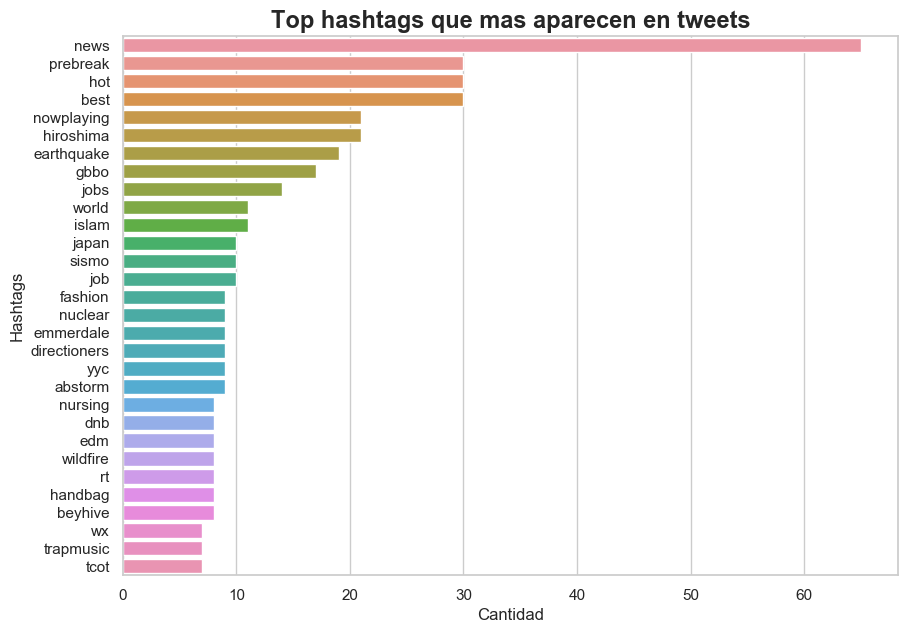

In [13]:
top_hashtags = hashtags_counts.head(30)
g = sns.barplot(x=top_hashtags.values, y=top_hashtags.index)
g.set_title("Top hashtags que mas aparecen en tweets", fontsize=17, fontweight='bold')
g.set_xlabel("Cantidad", fontsize=12)
g.set_ylabel("Hashtags", fontsize=12)

In [8]:
#tomo las palabras que empiezan con '@'
df_labels = df_palabras[df_palabras["words"].str.startswith('@')]
#junto las mismas palabras por si estan escritas en mayusculas y/o minusculas
df_labels["words"] = df_labels["words"].str.lower()
#quito los espacios de mas
df_labels["words"] = df_labels["words"].apply(lambda x: re.sub(' +',' ',x))
#quito los caracteres especiales que quedaron
df_labels["words"] = df_labels["words"].str.replace('_','')
df_labels["words"] = df_labels["words"].str.replace('@','')
df_labels["words"].value_counts().head(10)

youtube         83
                27
arianagrande    11
change           9
foxnews          9
potus            9
emmerdale        8
usatoday         8
justinbieber     7
djicemoon        7
Name: words, dtype: int64

In [9]:
 #me deshago de los arroba para no mostrarlos en la visualizacion
df_labels["words"] = df_labels["words"].str.replace('@','')
#quito el string vacio
labels_counts = df_labels["words"].value_counts()
labels_counts = labels_counts.drop(labels="")
labels_counts.head()

youtube         83
arianagrande    11
change           9
foxnews          9
potus            9
Name: words, dtype: int64

Text(0, 0.5, 'Usuarios')

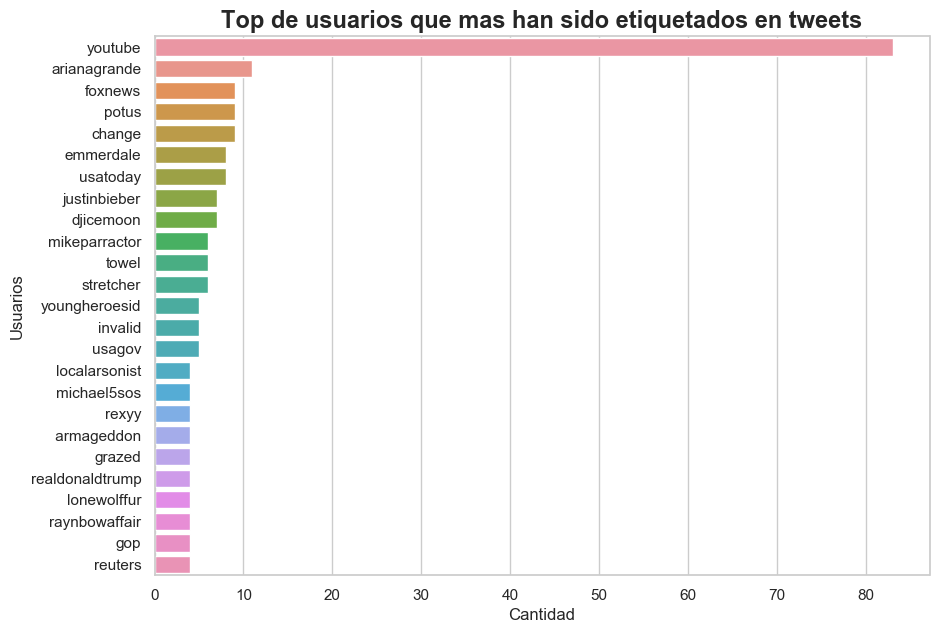

In [16]:
top_labels = labels_counts.head(25)
g = sns.barplot(x=top_labels.values, y=top_labels.index)
g.set_title("Top de usuarios que mas han sido etiquetados en tweets", fontsize=17, fontweight='bold')
g.set_xlabel("Cantidad", fontsize=12)
g.set_ylabel("Usuarios", fontsize=12)

In [ ]:
#interesante seria analizar el @YouTube por separado

In [10]:
#hago una limpieza del texto
#remuevo todos los caracteres no alfanumericos ni los '#@'
tweets["text"] = tweets["text"].str.lower()                                 #transformo todas las palabras a minusculas
tweets["text"] = tweets["text"].apply(lambda x: re.sub(r'[^\w#@]', ' ', x)) #remuevo todos los caracteres menos los alfanumericos ni los '#' y '@'
tweets["text"] = tweets["text"].apply(lambda x: re.sub(' +',' ',x))         #quito los espacios de mas
tweets["text"] = tweets["text"].str.replace('# ','')                        #quito los '#' que aparezcan solos
tweets["text"] = tweets["text"].str.replace('@ ','')                        #quito los '@' que aparezcan solos
tweets["text"] = tweets["text"].str.replace('_ ','')                        #quito los '_'

In [11]:
tweets["hashtag_count"] = tweets["text"].str.count('#')
tweets.head()

,id,keyword,location,text,target,hashtag_count
0,1,NaN,NaN,our deeds are the reason of this #earthquake m...,1,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1,0
2,5,NaN,NaN,all residents asked to shelter in place are be...,1,0
3,6,NaN,NaN,13 000 people receive #wildfires evacuation or...,1,1
4,7,NaN,NaN,just got sent this photo from ruby #alaska as ...,1,2


In [15]:
def concatenate(x,char):
    words = ""
    for word in x:
        if word.startswith(char):
            words = words + word + " "
    return words

In [16]:
#tweets["hashtags"] = tweets["text"].str.split(' ').apply(lambda x: [word for word in x if word.startswith('#')])
tweets["hashtags"] = tweets["text"].str.split(' ').apply(lambda x: concatenate(x,'#'))
tweets["labels_count"] = tweets["text"].str.count('@')
tweets["labels"] = tweets["text"].str.split(' ').apply(lambda x: concatenate(x,'@'))
tweets.head()

,id,keyword,location,text,target,hashtag_count,hashtags,labels_count,labels
0,1,NaN,NaN,our deeds are the reason of this #earthquake m...,1,1,#earthquake,0,
1,4,NaN,NaN,forest fire near la ronge sask canada,1,0,,0,
2,5,NaN,NaN,all residents asked to shelter in place are be...,1,0,,0,
3,6,NaN,NaN,13 000 people receive #wildfires evacuation or...,1,1,#wildfires,0,
4,7,NaN,NaN,just got sent this photo from ruby #alaska as ...,1,2,#alaska #wildfires,0,


In [17]:
tweets_con_hashtags = tweets[tweets["hashtag_count"] > 0]
len(tweets_con_hashtags)

1744

In [18]:
#filtro por target
tweets_falsos = tweets[tweets["target"]==0]
len(tweets_falsos)

4342

In [19]:
tweets_verdaderos = tweets[tweets["target"]==1]
len(tweets_verdaderos)

3271

In [20]:
df_palabras_v = pd.DataFrame(tweets_verdaderos["text"].str.split(' ', expand=True).stack(), columns=["words"])
df_palabras_f = pd.DataFrame(tweets_falsos["text"].str.split(' ', expand=True).stack(), columns=["words"])

In [21]:
df_hashtags_v = df_palabras_v[df_palabras_v["words"].str.startswith('#')]
df_hashtags_v["words"].value_counts().head(10)

#news          54
#hiroshima     22
#earthquake    19
#hot           13
#prebreak      13
#best          13
#japan         11
#india         10
#yyc           10
#breaking       9
Name: words, dtype: int64

Text(0, 0.5, 'Hashtags')

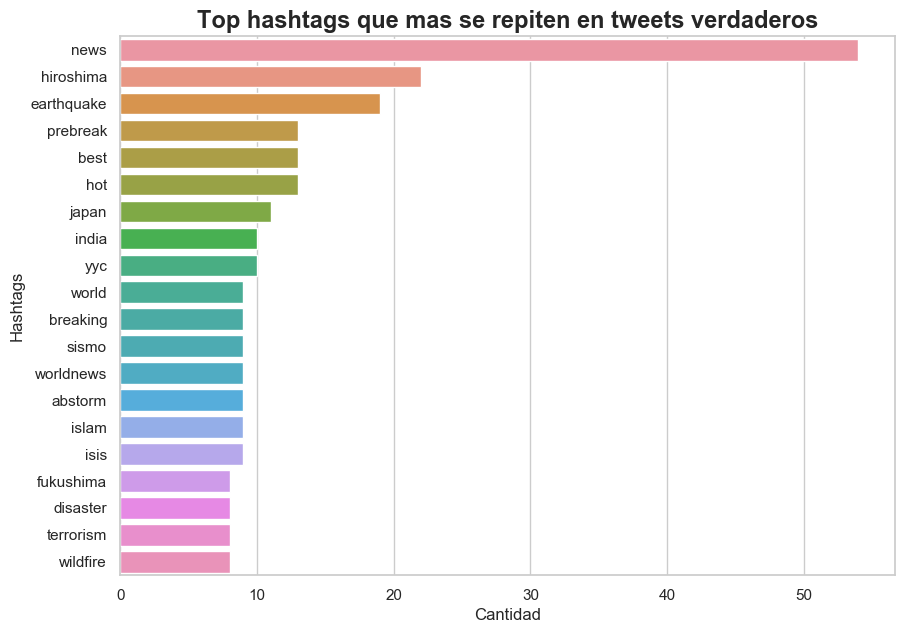

In [84]:
sin_hashtag = df_hashtags_v["words"].str.replace('#','')
top_hashtags = sin_hashtag.value_counts().head(20)
g = sns.barplot(x=top_hashtags.values, y=top_hashtags.index)
g.set_title("Top hashtags que mas se repiten en tweets verdaderos", fontsize=17, fontweight='bold')
g.set_xlabel("Cantidad", fontsize=12)
g.set_ylabel("Hashtags", fontsize=12)

In [19]:
df_hashtags_f = df_palabras_f[df_palabras_f["words"].str.startswith('#')]
df_hashtags_f["words"].value_counts().head(10)

#nowplaying    21
#news          20
#prebreak      17
#best          17
#hot           17
#gbbo          14
#jobs          14
#islam         14
#job           12
#hiring        10
Name: words, dtype: int64

Text(0, 0.5, 'Hashtags')

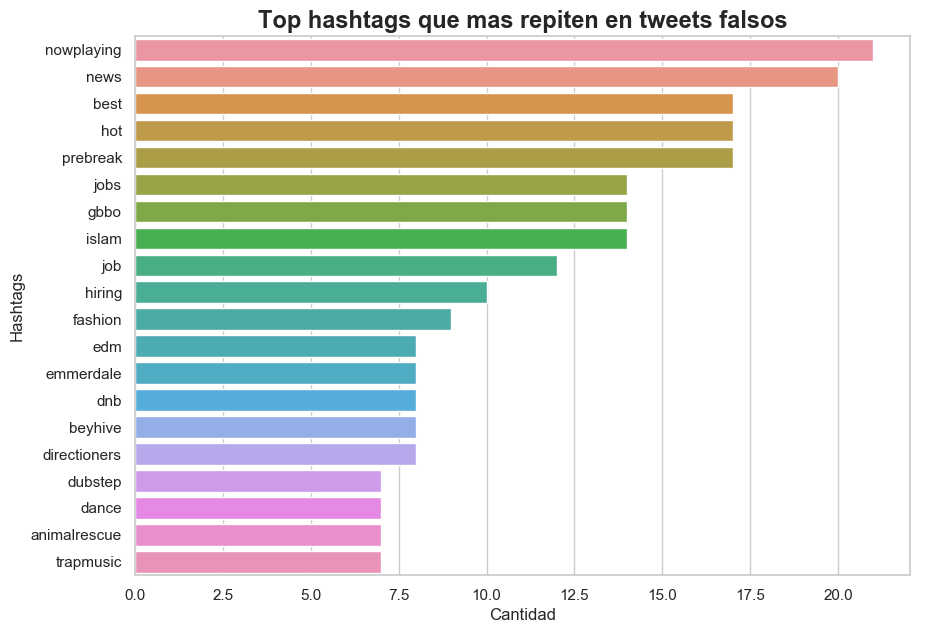

In [32]:
sin_hashtag = df_hashtags_f["words"].str.replace('#','')
top_hashtags = sin_hashtag.value_counts().head(20)
g = sns.barplot(x=top_hashtags.values, y=top_hashtags.index)
g.set_title("Top hashtags que mas repiten en tweets falsos", fontsize=17, fontweight='bold')
g.set_xlabel("Cantidad", fontsize=12)
g.set_ylabel("Hashtags", fontsize=12)

In [20]:
df_labels_v = df_palabras_v[df_palabras_v["words"].str.startswith('@')]
df_labels_v["words"].value_counts().head(10)

@youtube          18
@foxnews           8
@potus             6
@ap                5
@usagov            5
@usatoday          4
@change            4
@unsuckdcmetro     4
@michael5sos       3
@reuters           3
Name: words, dtype: int64

Text(0, 0.5, 'Usuarios')

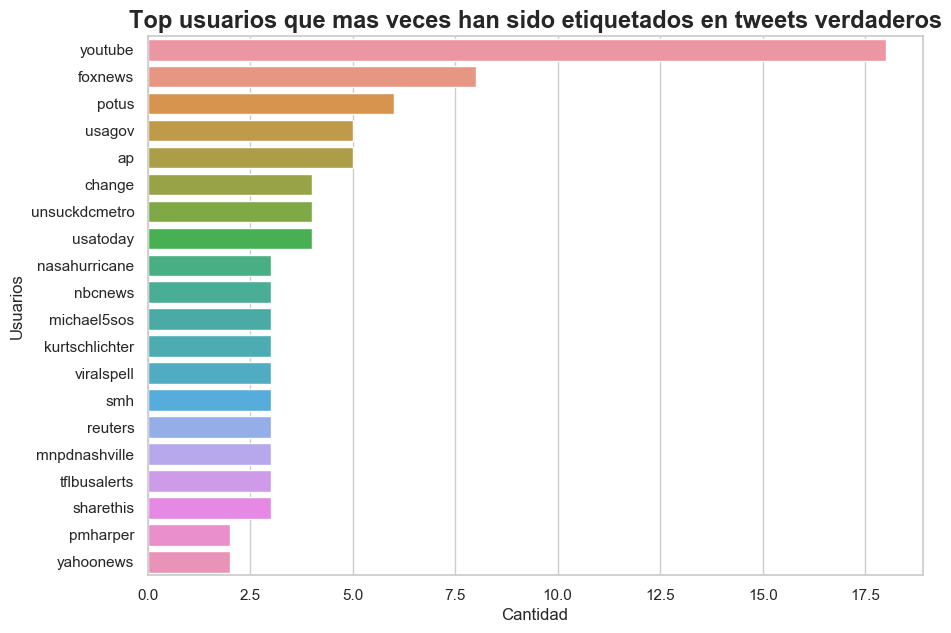

In [83]:
top_labels = df_labels_v["words"].str.replace('@','').value_counts().head(20)
g = sns.barplot(x=top_labels.values, y=top_labels.index)
g.set_title("Top usuarios que mas veces han sido etiquetados en tweets verdaderos", fontsize=17, fontweight='bold')
g.set_xlabel("Cantidad", fontsize=12)
g.set_ylabel("Usuarios", fontsize=12)

In [21]:
df_labels_f = df_palabras_f[df_palabras_f["words"].str.startswith('@')]
df_labels_f["words"].value_counts().head(10)

@youtube          65
@arianagrande     11
@justinbieber      7
@emmerdale         7
@djicemoon         7
@mikeparractor     6
@stretcher         5
@change            5
@invalid           5
@towel             5
Name: words, dtype: int64

Text(0, 0.5, 'Usuarios')

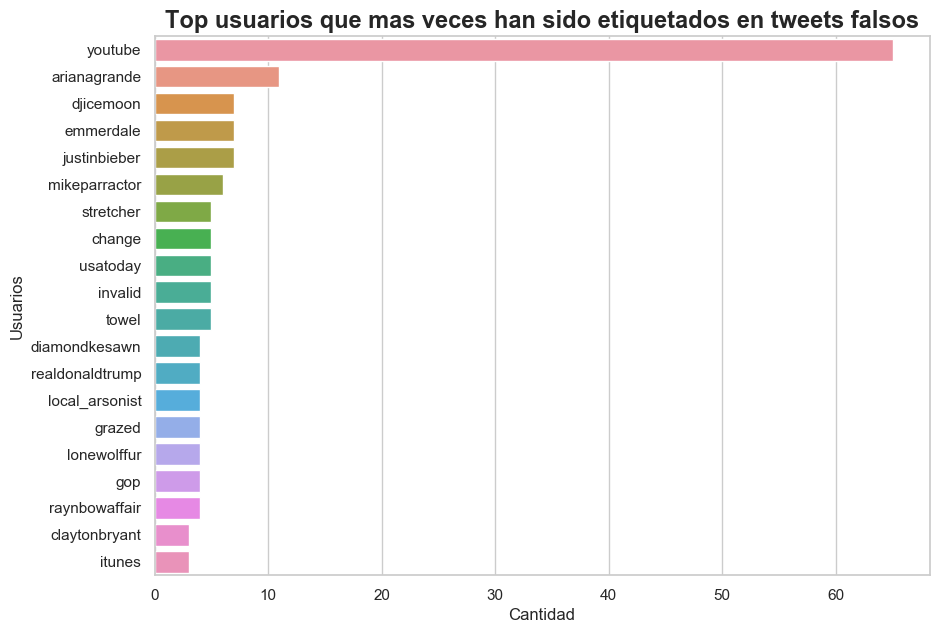

In [82]:
top_labels = df_labels_f["words"].str.replace('@','').value_counts().head(20)
g = sns.barplot(x=top_labels.values, y=top_labels.index)
g.set_title("Top usuarios que mas veces han sido etiquetados en tweets falsos", fontsize=17, fontweight='bold')
g.set_xlabel("Cantidad", fontsize=12)
g.set_ylabel("Usuarios", fontsize=12)

In [22]:
tweets.tail()    

,id,keyword,location,text,target,hashtag_count,hashtags,labels_count,labels
7608,10869,NaN,NaN,two giant cranes holding a bridge collapse int...,1,0,,0,
7609,10870,NaN,NaN,@aria_ahrary @thetawniest the out of control w...,1,0,,2,@aria_ahrary @thetawniest
7610,10871,NaN,NaN,m1 94 01 04 utc 5km s of volcano hawaii http t...,1,0,,0,
7611,10872,NaN,NaN,police investigating after an e bike collided ...,1,0,,0,
7612,10873,NaN,NaN,the latest more homes razed by northern califo...,1,0,,0,


In [23]:
tweets_verdaderos = tweets[tweets["target"]==1]
tweetsV_con_HyL = tweets_verdaderos[(tweets_verdaderos["hashtag_count"]>0) & (tweets_verdaderos["labels_count"]>0)]
tweetsV_con_H = tweets_verdaderos[(tweets_verdaderos["hashtag_count"]>0) & (tweets_verdaderos["labels_count"]==0)]
tweetsV_con_L = tweets_verdaderos[(tweets_verdaderos["hashtag_count"]==0) & (tweets_verdaderos["labels_count"]>0)]
tweetsV_sin_nada = tweets_verdaderos[(tweets_verdaderos["hashtag_count"]==0) & (tweets_verdaderos["labels_count"]==0)]
print(len(tweetsV_con_HyL))
print(len(tweetsV_con_L))
print(len(tweetsV_con_H))
print(len(tweetsV_sin_nada))

130
537
729
1875


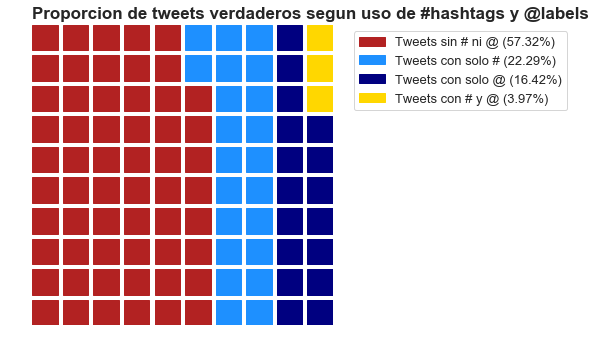

In [81]:
x = len(tweetsV_con_HyL)
y = len(tweetsV_con_L)
u = len(tweetsV_con_H)
v = len(tweetsV_sin_nada)
total = x + y + u + v
porcentajes = [round(v * 100/total, 2), round(u * 100/total, 2),\
               round(y * 100/total, 2), round(x * 100/total, 2)]
labels = ["Tweets sin # ni @ ({}%)".format(porcentajes[0]), "Tweets con solo # ({}%)".format(porcentajes[1]),\
            "Tweets con solo @ ({}%)".format(porcentajes[2]), "Tweets con # y @ ({}%)".format(porcentajes[3])]
fig = plt.figure(FigureClass = Waffle, figsize=(10,5), labels=labels, rows=10, values=porcentajes,\
                 colors=("firebrick", "dodgerblue", "navy", "gold"),\
                 legend={'loc': 'upper right', 'bbox_to_anchor': (1.8,1), 'fontsize': 13},\
                 title={'label': "Proporcion de tweets verdaderos segun uso de #hashtags y @labels",'loc': 'left', 'fontsize': 17, 'fontweight':'bold'})              

In [77]:
tweets_falsos = tweets[tweets["target"]==0]
tweetsF_con_HyL = tweets_falsos[(tweets_falsos["hashtag_count"]>0) & (tweets_falsos["labels_count"]>0)]
tweetsF_con_H = tweets_falsos[(tweets_falsos["hashtag_count"]>0) & (tweets_falsos["labels_count"]==0)]
tweetsF_con_L = tweets_falsos[(tweets_falsos["hashtag_count"]==0) & (tweets_falsos["labels_count"]>0)]
tweetsF_sin_nada = tweets_falsos[(tweets_falsos["hashtag_count"]==0) & (tweets_falsos["labels_count"]==0)]
print(len(tweetsF_con_HyL))
print(len(tweetsF_con_L))
print(len(tweetsF_con_H))
print(len(tweetsF_sin_nada))

221
1122
664
2335


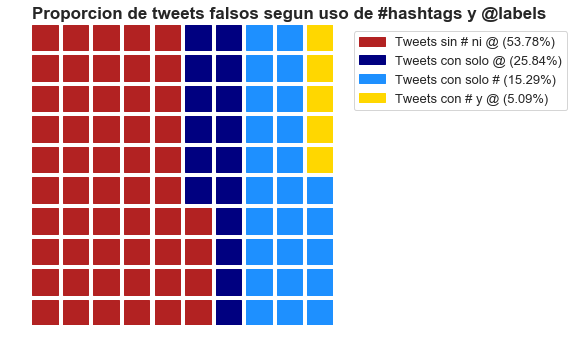

In [80]:
x = len(tweetsF_con_HyL)
y = len(tweetsF_con_L)
u = len(tweetsF_con_H)
v = len(tweetsF_sin_nada)
total = x + y + u + v
porcentajes = [round(v * 100/total, 2), round(u * 100/total, 2),\
               round(y * 100/total, 2), round(x * 100/total, 2)]
labels = ["Tweets sin # ni @ ({}%)".format(porcentajes[0]),"Tweets con solo @ ({}%)".format(porcentajes[2]),\
            "Tweets con solo # ({}%)".format(porcentajes[1]), "Tweets con # y @ ({}%)".format(porcentajes[3])]
fig = plt.figure(FigureClass = Waffle, figsize=(10,5), labels=labels, rows=10, values=porcentajes,\
                 colors=("firebrick", "navy", "dodgerblue", "gold"),\
                 legend={'loc': 'upper right', 'bbox_to_anchor': (1.8,1), 'fontsize': 13},\
                 title={'label': "Proporcion de tweets falsos segun uso de #hashtags y @labels",'loc': 'left', 'fontsize': 17, 'fontweight':'bold'})              

In [23]:
tweets.head()

,id,keyword,location,text,target,hashtag_count,hashtags,labels_count,labels
0,1,NaN,NaN,our deeds are the reason of this #earthquake m...,1,1,#earthquake,0,
1,4,NaN,NaN,forest fire near la ronge sask canada,1,0,,0,
2,5,NaN,NaN,all residents asked to shelter in place are be...,1,0,,0,
3,6,NaN,NaN,13 000 people receive #wildfires evacuation or...,1,1,#wildfires,0,
4,7,NaN,NaN,just got sent this photo from ruby #alaska as ...,1,2,#alaska #wildfires,0,


In [24]:
tweets.loc[:,["text","target","hashtags","hashtag_count"]].sort_values(by="hashtag_count", ascending=False).head(10)

,text,target,hashtags,hashtag_count
4468,no #news of #hostages in #libya http t co exil...,1,#news #hostages #libya #india #terrorism #afri...,13
7197,rare insight into #terror and how to fight it ...,1,#terror #cameroon #usa #whitehouse #es #fr #ni...,13
4483,no #news of #hostages in #libya http t co k9fb...,1,#news #hostages #libya #india #terrorism #afri...,13
4480,no #news of #hostages in #libya http t co bjjo...,1,#news #hostages #libya #india #terrorism #afri...,13
318,rt @rtrrtcoach #love #truelove #romance lith #...,0,#love #truelove #romance #voodoo #seduction #a...,11
312,rt @ophiuchus2613 #love #truelove #romance lit...,0,#love #truelove #romance #voodoo #seduction #a...,11
6626,truth https t co 4zqrsaqrrt #news #bbc #cnn #i...,1,#news #bbc #cnn #islam #truth #god #isis #terr...,10
6623,truth https t co k44tl3rfmy #news #bbc #cnn #i...,0,#news #bbc #cnn #islam #truth #god #isis #terr...,10
6618,truth https t co 2y4rgob7pj #news #bbc #cnn #i...,1,#news #bbc #cnn #islam #truth #god #isis #terr...,10
6602,truth https t co bejftygjil #news #bbc #cnn #i...,0,#news #bbc #cnn #islam #truth #god #isis #terr...,10


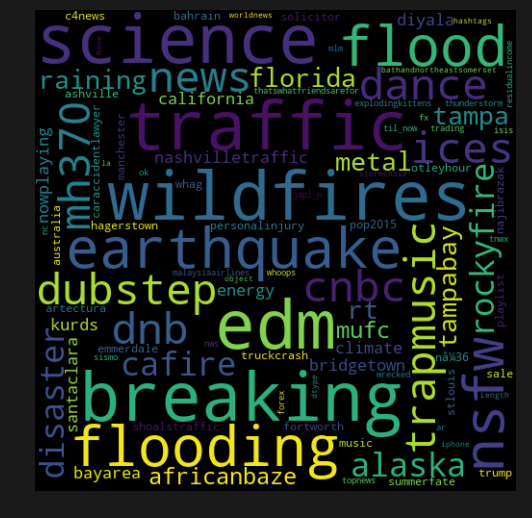

In [29]:
#wordclod sobre la columna de hashtags
tweets_con_hashtags = tweets[tweets["hashtag_count"]>0]
wordcloud = WordCloud(width = 500, height = 500, min_font_size = 5, max_font_size = 70, max_words = 100, 
                      background_color = 'black', stopwords = STOPWORDS).generate(str(tweets_con_hashtags["hashtags"]))
fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [26]:
tweets.loc[:,["text","target","labels","labels_count"]].sort_values(by="labels_count", ascending=False).head(10)

,text,target,labels,labels_count
3491,#cum explosion @begforcum @allday_cumshots @cu...,0,@begforcum @allday_cumshots @cumcovered @sexyc...,8
5383,@montetjwitter11 @mets @audreyp77 @teena_797 @...,0,@montetjwitter11 @mets @audreyp77 @teena_797 @...,7
551,ya boy clip vs 4kus full battle @15moferadio @...,0,@15moferadio @heavybag201 @battle_dom @qotring...,6
648,welcome @djryanwolf @djcoreygrand @djknyce @dj...,0,@djryanwolf @djcoreygrand @djknyce @djoneplust...,6
6311,@invalid @grazed @towel @stretcher @pllolz @wi...,0,@invalid @grazed @towel @stretcher @pllolz @wi...,6
135,anyone need a p u tonight i play hybrid slayer...,0,@cod8sandscrims @empirikgaming @codawscrims @4...,6
6305,@pllolz @grazed @stretcher @invalid @witter @t...,0,@pllolz @grazed @stretcher @invalid @witter @t...,6
3919,@creationmin @rwrabbit @gooneratheist @atheist...,0,@creationmin @rwrabbit @gooneratheist @atheist...,5
5744,@teamvodg discovered by @nickcannon listen buy...,0,@teamvodg @nickcannon @realmandyrain @itunesmu...,5
6313,@grazed @invalid @stretcher @rexyy @towel ben ...,0,@grazed @invalid @stretcher @rexyy @towel,5


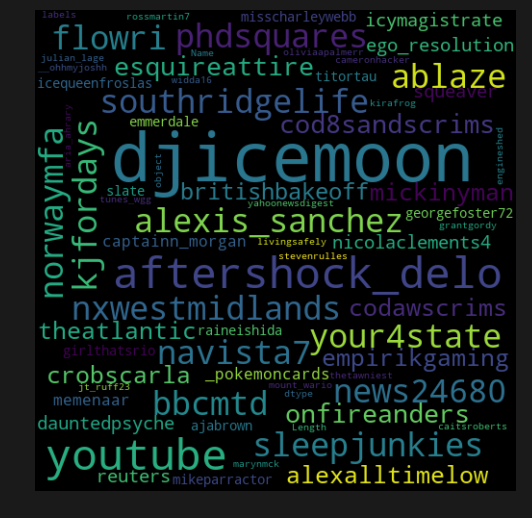

In [30]:
#hacer un wordcloud sobre la columna labels
tweets_con_labels = tweets[tweets["labels_count"]>0]
wordcloud = WordCloud(width = 500, height = 500, min_font_size = 5, max_font_size = 70, max_words = 100, 
                      background_color = 'black', stopwords = STOPWORDS).generate(str(tweets_con_labels["labels"]))
fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [95]:
#Estadisticas sobre uso de hashtags segun el target
grouped_by_target = tweets.groupby("target").agg({"hashtag_count":["mean","max","sum"],"labels_count":["mean","max","sum"]})
stacked = grouped_by_target.stack()
stacked

hashtag_count         labels_count
target                                               
0      mean                 0.39                 0.42
       max                 11.00                 8.00
       sum              1,691.00             1,827.00
1      mean                 0.50                 0.27
       max                 13.00                 5.00
       sum              1,644.00               892.00

In [103]:
tweets_con_keywords = tweets[~tweets["keyword"].isnull()]
top5_keywords = tweets["keyword"].value_counts().head().index.tolist()
tweets_top5_keywords = tweets[tweets["keyword"].isin(top5_keywords)]
tweets_top5_keywords["keyword"].value_counts()

fatalities     45
deluge         42
armageddon     42
body%20bags    41
sinking        41
Name: keyword, dtype: int64